### Import **Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data **Exploration**

In [ ]:
# Load the dataset
df = pd.read_csv('Housing.csv')

# --- Data Exploration ---
print("\n--- Exploring the Dataset ---")
print("\nDataset Info:")
df.info()

print("\nFirst 5 rows of the dataset:")
print(df.head())

print("\nMissing values in each column:")
print(df.isnull().sum())


--- Exploring the Dataset ---

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB

First 5 rows of the dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \

### Data **Cleaning**


Dataset after converting categorical features:
      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   semi-furnished  unfurnished  
0               0            0  
1               0            0  
2          

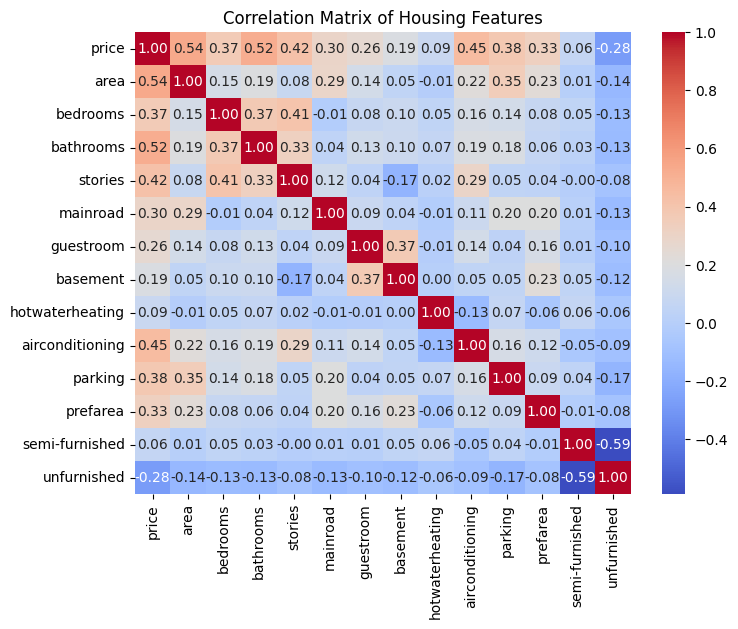

In [ ]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

furnishing_status = pd.get_dummies(df['furnishingstatus'], drop_first=True, dtype=int)

df = pd.concat([df, furnishing_status], axis=1)

df.drop(['furnishingstatus'], axis=1, inplace=True)

print("\nDataset after converting categorical features:")
print(df.head())

print("\n--- Visualizing Data ---")
plt.figure(figsize=(8, 6))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Housing Features')
plt.show()


### Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
numerical_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

X_train[numerical_vars] = scaler.fit_transform(X_train[numerical_vars])
X_test[numerical_vars] = scaler.transform(X_test[numerical_vars])

print("\nNumerical features have been scaled.")
print("\nTraining data head after scaling:")
print(X_train.head())

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("\n--- Linear Regression Model Trained Successfully ---")

print("\nModel Coefficients:")
coefficients = pd.DataFrame(lr_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

print("\nModel Intercept:", lr_model.intercept_)


Numerical features have been scaled.

Training data head after scaling:
         area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
46   0.298969       0.4   0.333333  1.000000         1          0         0   
93   0.381443       0.4   0.333333  0.000000         1          0         1   
335  0.148866       0.2   0.000000  0.000000         1          0         1   
412  0.065979       0.4   0.000000  0.333333         1          0         1   
471  0.144330       0.4   0.000000  0.333333         1          0         0   

     hotwaterheating  airconditioning   parking  prefarea  semi-furnished  \
46                 0                1  0.333333         0               0   
93                 0                1  1.000000         0               1   
335                0                1  0.666667         0               0   
412                0                0  0.000000         1               0   
471                0                0  0.000000         0          

### Modal **Evaluation** and **Visualization**

Mean Squared Error (MSE): 1754318687330.67
R-squared: 0.65
(The model explains 65% of the variance in the house prices)


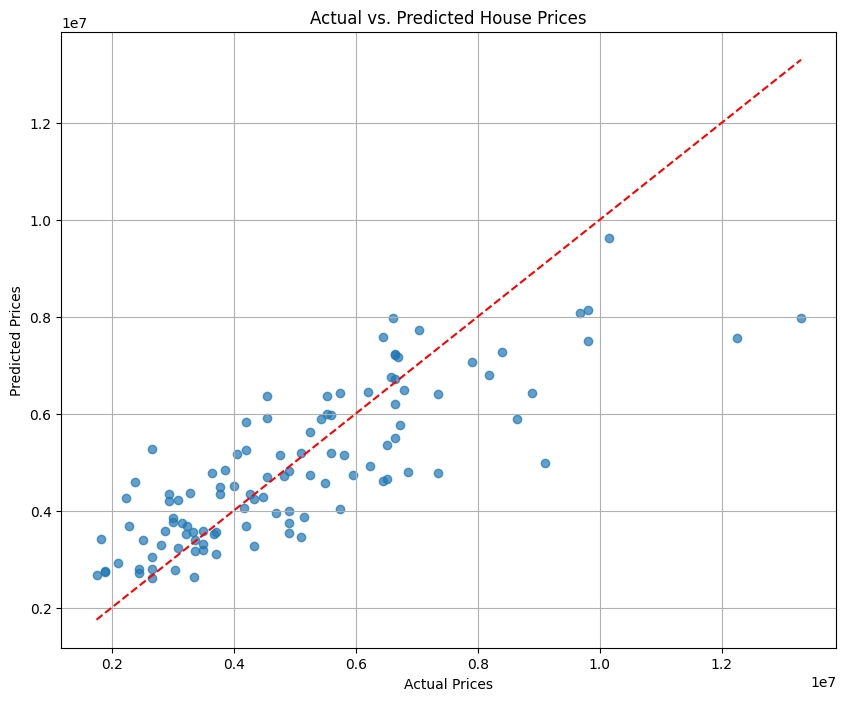

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")
print(f"(The model explains {r2:.0%} of the variance in the house prices)")

plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.grid(True)
plt.show()



### Interactive Prediction **Function**

In [ ]:
def predict_price():
    """
    Takes user input for house features and predicts the price.
    """
    print("\n--- Enter House Details for Price Prediction ---")

    try:
        # Get user input
        area = float(input("Area (in sq. ft., e.g., 5000): "))
        bedrooms = int(input("Number of Bedrooms (e.g., 3): "))
        bathrooms = int(input("Number of Bathrooms (e.g., 2): "))
        stories = int(input("Number of Stories (e.g., 2): "))
        parking = int(input("Number of Parking Spaces (e.g., 2): "))

        mainroad = 1 if input("Is it on a main road? (yes/no): ").lower() == 'yes' else 0
        guestroom = 1 if input("Does it have a guest room? (yes/no): ").lower() == 'yes' else 0
        basement = 1 if input("Does it have a basement? (yes/no): ").lower() == 'yes' else 0
        hotwater = 1 if input("Does it have hot water heating? (yes/no): ").lower() == 'yes' else 0
        ac = 1 if input("Does it have air conditioning? (yes/no): ").lower() == 'yes' else 0
        prefarea = 1 if input("Is it in a preferred area? (yes/no): ").lower() == 'yes' else 0

        furnishing = input("Furnishing status (furnished/semi-furnished/unfurnished): ").lower()

        input_data = pd.DataFrame({
            'area': [area], 'bedrooms': [bedrooms], 'bathrooms': [bathrooms],
            'stories': [stories], 'mainroad': [mainroad], 'guestroom': [guestroom],
            'basement': [basement], 'hotwaterheating': [hotwater],
            'airconditioning': [ac], 'parking': [parking], 'prefarea': [prefarea],
            'semi-furnished': [1 if furnishing == 'semi-furnished' else 0],
            'unfurnished': [1 if furnishing == 'unfurnished' else 0]
        })

        input_data = input_data[X.columns]

        input_data[numerical_vars] = scaler.transform(input_data[numerical_vars])

        prediction = lr_model.predict(input_data)

        print("\n-----------------------------------------")
        print(f"Predicted House Price: ${prediction[0]:,.2f}")
        print("-----------------------------------------")

    except ValueError:
        print("\nInvalid input. Please enter numerical values for numerical fields.")
    except Exception as e:
        print(f"\nAn error occurred: {e}")

predict_price()



--- Enter House Details for Price Prediction ---
Area (in sq. ft., e.g., 5000): 6000
Number of Bedrooms (e.g., 3): 2
Number of Bathrooms (e.g., 2): 2
Number of Stories (e.g., 2): 1
Number of Parking Spaces (e.g., 2): 1
Is it on a main road? (yes/no): yes
Does it have a guest room? (yes/no): no
Does it have a basement? (yes/no): no
Does it have hot water heating? (yes/no): yes
Does it have air conditioning? (yes/no): yes
Is it in a preferred area? (yes/no): yes
Furnishing status (furnished/semi-furnished/unfurnished): semi-furnished

-----------------------------------------
Predicted House Price: $6,997,615.99
-----------------------------------------
